In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import matplotlib to show plots inline.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import glob
import os

import astropy.units as u
import matplotlib as mpl
import sys 
sys.path.append("../../")
from plot_OpSims import plot_OpSims_Nqso_hist

In [3]:
# import maf python modules
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles

In [4]:
# import convenience functions
import sys 
sys.path.append("../../../LSST_OpSim")
from Scripts_NBs.opsimUtils import *

## Load the results
We first load the results of the run into memory. We will read jointly the FBS v1.5 and FBS v1.6 results, and will differentiate at the time of plotting.

In [5]:
NSIDE=64
your_username = "rjassef"
folder_mafoutput = "Nqso_EM5_{0:d}".format(NSIDE)
resultDbPath = '/home/idies/workspace/Temporary/{0}/scratch/MAFOutput/{1}'.format(
    your_username, folder_mafoutput)
metricDataPath = '/home/idies/workspace/Temporary/{0}/scratch/MAFOutput/{1}/MetricData/'.format(
    your_username, folder_mafoutput)

In [6]:
# get a dictionary of resultDb from given directory
resultDbs = getResultsDbs(resultDbPath)

In [7]:
# retrieve metricBundles for each opsim run and store them in a dictionary
bundleDicts_raw = dict()
for runName in resultDbs:
    bundleDicts_raw[runName] = bundleDictFromDisk(resultDbs[runName], runName, metricDataPath)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSID

In [8]:
#Rearrange the bundleDicts_raw dictionary so that the keys are always the same as for the first run.
dbRuns = list(bundleDicts_raw.keys())
Keys = list(bundleDicts_raw[dbRuns[0]].keys())
bundleDicts = dict()
for runName in dbRuns:
    bundleDicts[runName] = dict()
    Keys_raw = bundleDicts_raw[runName]
    for Key in Keys:
        for Key_raw in Keys_raw:
            if Key[1]==Key_raw[1]:
                bundleDicts[runName][Key] = bundleDicts_raw[runName][Key_raw]

In [9]:
# check keys
dbRuns = list(resultDbs.keys())
bd_keys = list(bundleDicts[dbRuns[0]].keys())
print(bd_keys)

[(1, 'Nqso_i')]


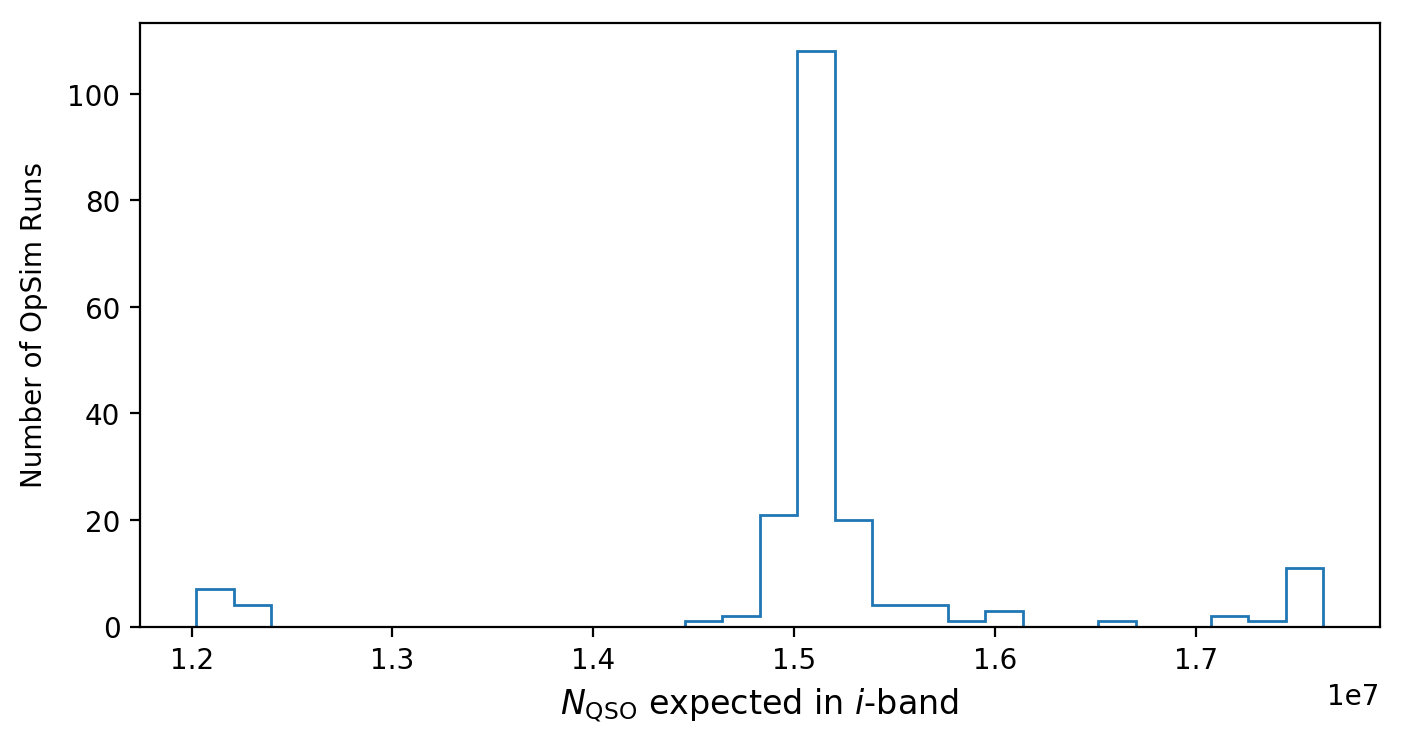

In [10]:
Key = (1, 'Nqso_i')
xlabel = r'$N_{\rm QSO}$ expected in $i$-band'
plot_OpSims_Nqso_hist(Key, bundleDicts, xlabel=xlabel, 
                      datamin=None, datamax=None, bins=30, figsize=(8,4))
plt.savefig("Nqso_i.png")

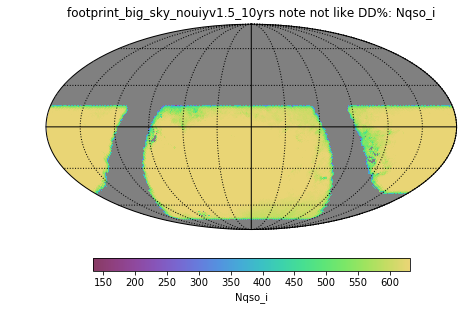

In [12]:
run = "footprint_big_sky_nouiyv1.5_10yrs"
ph = plots.PlotHandler(savefig=False)
healpixSky = plots.HealpixSkyMap()
ph.setMetricBundles([bundleDicts[run][Key]])
ph.plot(plotFunc=healpixSky)
plt.savefig("Area_"+run+".png")

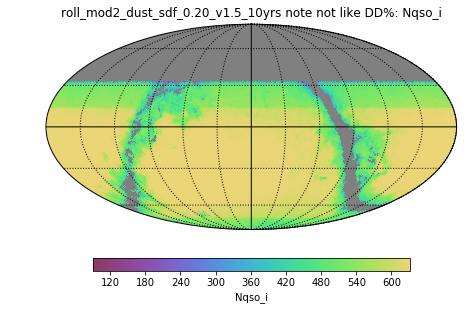

In [13]:
run = "roll_mod2_dust_sdf_0.20_v1.5_10yrs"
ph = plots.PlotHandler(savefig=False)
healpixSky = plots.HealpixSkyMap()
ph.setMetricBundles([bundleDicts[run][Key]])
ph.plot(plotFunc=healpixSky)
plt.savefig("Area_"+run+".png")